In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#df.drop_duplicates(inplace=True) supprime les lignes qui presentent les meme valeurs de colonne dans le df
df = pd.read_csv("données sans doublon.csv")

display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


__
## Comprendre les données
__

In [130]:
df.shape #taille de dataframe
display(df.dtypes) #verifier types de chaque variable
df.columns.values

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

__
## Données manquantes
__

In [131]:
df.isnull().values.any()

False

In [132]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

__
## Supprimer les doublons
__

In [133]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


___
## Corriger les dtypes
___

Cela permet de gagner en mémoire et de faciliter l'analyse des données que l'on verra plus tard.

In [142]:
df['smoker'] = df['smoker'].map({"yes":1, "no":0})

df['sex'] = df['sex'].map({"female":1, "male":0})

df.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

__
## Créer intervalles de valeurs pour le BMI
__

Le BMI (Body Mass Index), ou IMC (Indice de Masse Corporelle), est calculé de la même manière aux États-Unis et en France. L'IMC est une mesure qui évalue la corpulence d'une personne en utilisant sa taille et son poids. La formule du BMI est la suivante :

####                                    BMI= Poids en kilogrammes / (Taille en mètres)2        

C'est une mesure simple qui donne une indication générale sur la catégorie de poids d'une personne.

Afin de faciliter notre analyse, nous allons établir des plages de valeurs basées sur les recommandations médicales de classement du BMI: 

        * BMI<18.5: Insuffisance pondérale
        * 18.5≤BMI<25: Poids normal
        * 25≤BMI<30: Surpoids
        * 30≤BMI<35: Obésité de classe 1 (modérée)
        * 35≤BMI<40: Obésité de classe 2 (sévère)
        * BMI≥40BMI≥40 : Obésité de classe 3 (très sévère ou morbide)

In [145]:
classes = ['<18.5', '[18.5,25[', '[25,30[', '[30,35[', '[35,40[', '40.0<']
classes_str = ['Insuffisance pondérale', 'Poids normal', 'Surpoids', 'Obésité modérée', 'Obésité sévère', 'Obésité morbide']
bins = [0, 18.5, 25, 30, 35, 40, np.inf]

# Création de la colonne 'bmi_category' dans le DataFrame
df['bmi_category'] = pd.cut(df['bmi'], bins=bins, labels=classes_str)

In [148]:
df["age"].describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [151]:
#df['is_smoker'] = (df['smoker'] == 'yes').astype(int)  ajoute une colonne is_smoker au df avec 1 pour fumeur, Osinon, astypeconvertit directement les booléens en 1 ou 0
#age : 18 à 64

classe_age = ["18-25", "26-30", "31-40", "41-50","51-60","61+"]
age_bins = [18, 25, 30, 40, 50, 60, np.inf ]

df['age_category']= pd.cut(df['age'], bins = age_bins, labels= classe_age, include_lowest=True)
df

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,1,27.900,0,1,southwest,16884.92400,Surpoids,18-25
1,18,0,33.770,1,0,southeast,1725.55230,Obésité modérée,18-25
2,28,0,33.000,3,0,southeast,4449.46200,Obésité modérée,26-30
3,33,0,22.705,0,0,northwest,21984.47061,Poids normal,31-40
4,32,0,28.880,0,0,northwest,3866.85520,Surpoids,31-40
...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,northwest,10600.54830,Obésité modérée,41-50
1333,18,1,31.920,0,0,northeast,2205.98080,Obésité modérée,18-25
1334,18,1,36.850,0,0,southeast,1629.83350,Obésité sévère,18-25
1335,21,1,25.800,0,0,southwest,2007.94500,Surpoids,18-25


___
### Analyse bivariée
___

Pour évaluer si il y a un lien entre les différentes variables explicatives et les charges, on les compare dans des analyses bivariées. On opte pour une subdivision des graphiques pour visualiser l'ensemble des courbes en un seul coup d'oeil.

On a le choix entre plt.plot qui nécessite de faire un aggrégat sur les moyennes des charges pour élaborer le graphique, ou recourir à la fonction sns.barplot qui prend calcule directement la moyenne des valeurs pour chaque catégorie de l'axe des abscices.



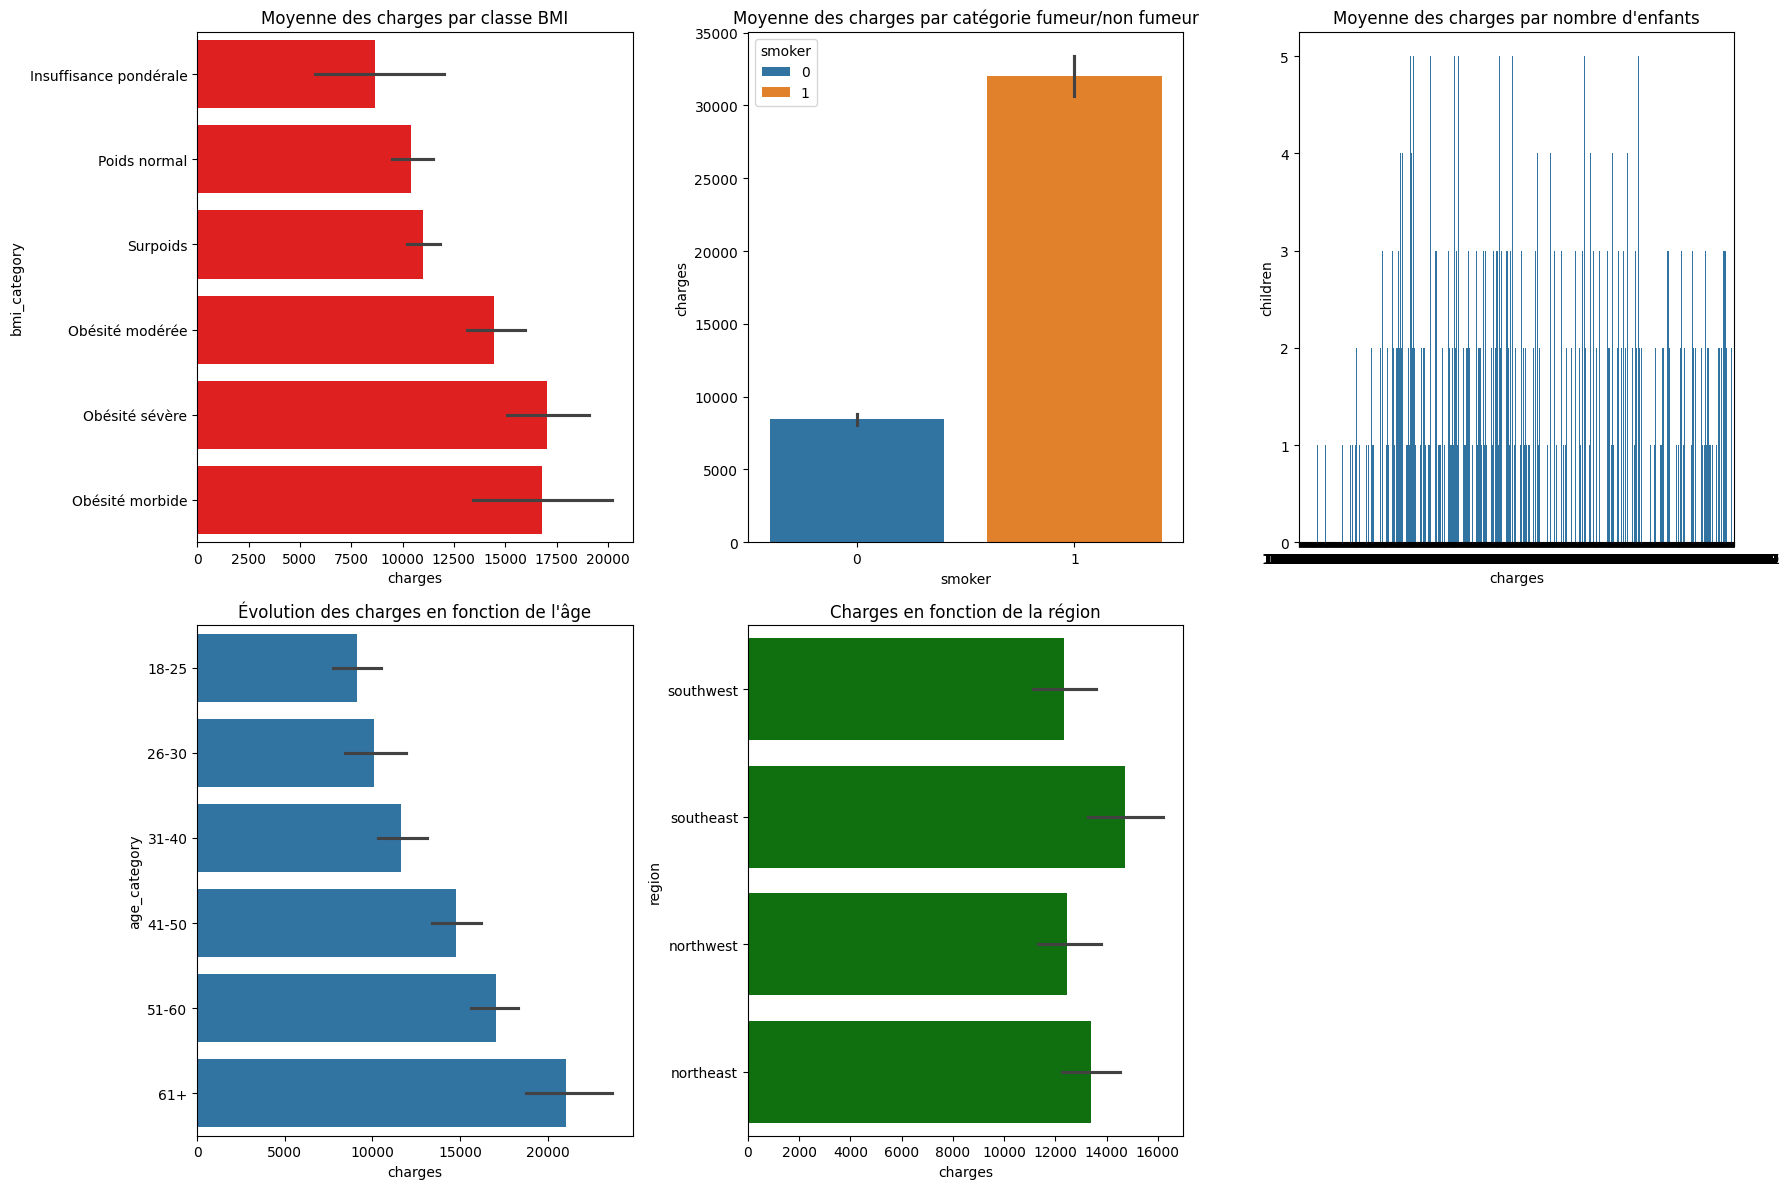

In [153]:

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
sns.barplot(x='charges', y='bmi_category', data=df, color="red")
plt.title('Moyenne des charges par classe BMI')

# Barres pour la moyenne des charges par classe fumeur et non fumeur
plt.subplot(2, 3, 2)
sns.barplot(x='smoker', y='charges', data=df, hue='smoker')
plt.title('Moyenne des charges par catégorie fumeur/non fumeur')

# Barres pour la moyenne des charges par nombre d'enfants
plt.subplot(2, 3, 3)
sns.barplot(x='charges', y='children', data=df)
plt.title('Moyenne des charges par nombre d\'enfants')

# Barres pour les charges moyennes par age
plt.subplot(2, 3, 4)
sns.barplot(x='charges', y='age_category', data=df)
plt.title('Évolution des charges en fonction de l\'âge')

# Barres pour les charges moyennes par region
plt.subplot(2, 3, 5)
sns.barplot(x='charges', y='region', data=df, color='green')
plt.title('Charges en fonction de la région')

plt.tight_layout()
plt.show()


In [ ]:
df["children"].describe()

df.groupby('children').children.count()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
display(df["smoker"].describe())

display(df.groupby('smoker').smoker.count())

count     1337
unique       2
top         no
freq      1063
Name: smoker, dtype: object

smoker
no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
display(df["region"].describe())

display(df.groupby('region').region.count())

count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object

region
northeast    324
northwest    324
southeast    364
southwest    325
Name: region, dtype: int64

In [ ]:
display(df["charges"].describe())

display(df[df["charges"] < 4746.344000])


count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

,age,sex,bmi,children,smoker,region,charges,group,bmi_class
1,18,male,33.770,1,no,southeast,1725.55230,1,"35.0, 39.0"
2,28,male,33.000,3,no,southeast,4449.46200,1,"35.0, 39.0"
4,32,male,28.880,0,no,northwest,3866.85520,1,"30.0, 34.9"
5,31,female,25.740,0,no,southeast,3756.62160,1,"30.0, 34.9"
10,25,male,26.220,0,no,northeast,2721.32080,1,"30.0, 34.9"
...,...,...,...,...,...,...,...,...,...
1316,18,male,53.130,0,no,southeast,1163.46270,1,NaN
1323,31,male,25.935,1,no,northwest,4239.89265,1,"30.0, 34.9"
1333,18,female,31.920,0,no,northeast,2205.98080,1,"35.0, 39.0"
1334,18,female,36.850,0,no,southeast,1629.83350,1,40.0<


### MAPPING

In [ ]:
mapping = {'male': 0, 'female': 1}

df_mapping = df[['sex', 'charges']]
df_mapping['sex'] = df_mapping['sex'].map(mapping)

display(df_mapping)

/tmp/ipykernel_38553/393739012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mapping['sex'] = df_mapping['sex'].map(mapping)


,sex,charges
0,1,16884.92400
1,0,1725.55230
2,0,4449.46200
3,0,21984.47061
4,0,3866.85520
...,...,...
1332,0,10600.54830
1333,1,2205.98080
1334,1,1629.83350
1335,1,2007.94500


In [ ]:
df_group = df

df_group['group'] = np.where(df_group['charges'] < 4746.344000, '1', 
                             np.where(df_group['charges'] < 9386.161300, '2', 
                             np.where(df_group['charges'] < 16657.717450, '3', '4')))

# df_age['group_age'] = df_age['group'] + '|' + df_age['age'].astype(str)

df_age = df_group[['age', 'charges']]
df_age = df_age.groupby(['age']).agg({'charges': 'mean'}).reset_index()

df_sex = df_group[['sex', 'group']]
df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex']
df_sex = df_sex[['group_sex']]
df_sex = df_sex.groupby(['group_sex']).agg({'group_sex': 'count'})
df_sex['group'] = df_sex.index
df_sex['sex'] = df_sex.index
df_sex['group'] = df_sex['group'].str[0]
df_sex['sex'] = df_sex['sex'].str[2:]
df_sex = df_sex.pivot_table(values='group_sex', index=['group'], columns='sex', aggfunc='sum').reset_index()

display(df_age, df_sex)

/var/folders/83/skc59h713n1f5fpwznbhnkr80000gn/T/ipykernel_3236/789872840.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sex['group_sex'] = df_sex['group'] + '|' + df_sex['sex']


,age,charges
0,18,7086.217556
1,19,9868.929428
2,20,10159.697736
3,21,4730.464330
4,22,10012.932802
5,23,12419.820040
6,24,10648.015962
7,25,9838.365311
8,26,6133.825309
9,27,12184.701721


sex,group,female,male
0,1,160,174
1,2,170,164
2,3,185,149
3,4,147,188


<Figure size 800x800 with 0 Axes>

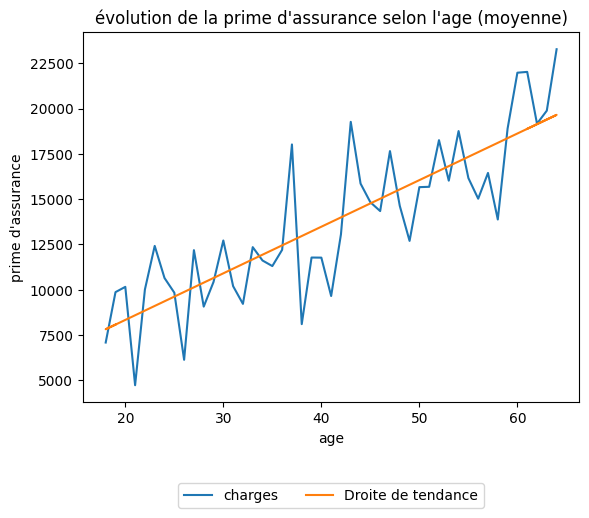

In [ ]:
df_graph = pd.DataFrame(df_age)

# Création d'un graphique de lignes pour plusieurs séries de données
plt.figure(figsize=(8, 8))  # Définit la taille de la figure

df_graph.plot(x='age', y=['charges'], kind='line')

# Ajouter des labels et un titre
plt.xlabel('age')
plt.ylabel("prime d'assurance")
plt.title("évolution de la prime d'assurance selon l'age (moyenne)")

# Calcul de la droite de tendance (régression linéaire)
coefficients = np.polyfit(df['age'], df['charges'], 1)
tendance = np.poly1d(coefficients)
plt.plot(df['age'], tendance(df['age']), label='Droite de tendance')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


<Figure size 800x600 with 0 Axes>

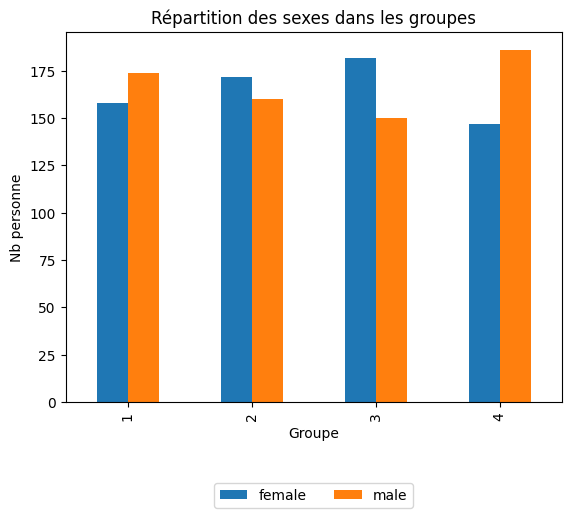

In [ ]:
df_sex = pd.DataFrame(df_sex)

# Création d'un graphique à barres à partir du DataFrame
plt.figure(figsize=(8, 6))  # Définit la taille de la figure

df_sex.plot(x='group', y=['female', 'male'], kind='bar')

# Ajouter des labels et un titre
plt.xlabel('Groupe')
plt.ylabel('Nb personne')
plt.title('Répartition des sexes dans les groupes')

# Afficher la légende en dessous du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Afficher le graphique
plt.show()


Etudions l'évolution de la prime d'assurances en fonction du BMI

In [ ]:
classes = ['15,19.9', '20.0,24.9', '25,29.9', '30.0,34.9', '35.0,39.0', '40.0<']
bins = [15, 19.9, 20, 25, 30, 35, 40]

df_bmi['bmi_class'] = pd.cut(df_bmi['bmi'], bins=bins, labels=classes, include_lowest=True)

charges_moyennes_par_classe = df_bmi.groupby('bmi_class')['charges'].mean()

plt.figure(figsize=(10, 8))
plt.bar(charges_moyennes_par_classe.index, charges_moyennes_par_classe, alpha=0.7, label='Charges moyennes')

# Ajustez la taille de la fenêtre glissante pour démarrer à la première barre
charges_moyennes_par_classe_droite = df_bmi.groupby('bmi_class')['charges'].mean().rolling(window=1, min_periods=1).mean()

plt.plot(charges_moyennes_par_classe_smooth.index, charges_moyennes_par_classe_smooth, color='red', linewidth=2, marker='o', label='Courbe lissée')

plt.xlabel('Classes de BMI')
plt.ylabel('Charges moyennes')
plt.title('Charges moyennes en fonction de la classe de BMI')
plt.legend()

# Afficher le graphique
plt.show()


NameError: name 'df_bmi' is not defined

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,NaN,southwest,16884.92400,Surpoids
1,18,0,33.770,1,NaN,southeast,1725.55230,Obésité modérée
2,28,0,33.000,3,NaN,southeast,4449.46200,Obésité modérée
3,33,0,22.705,0,NaN,northwest,21984.47061,Poids normal
4,32,0,28.880,0,NaN,northwest,3866.85520,Surpoids
...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,NaN,northwest,10600.54830,Obésité modérée
1333,18,1,31.920,0,NaN,northeast,2205.98080,Obésité modérée
1334,18,1,36.850,0,NaN,southeast,1629.83350,Obésité sévère
1335,21,1,25.800,0,NaN,southwest,2007.94500,Surpoids


In [ ]:
plt.figure()

#plt.subplot(lignes, colonnes,position)


En regardant l'évolution de la courbe, on remarque que lorsque le BMI augmente, la prime augmente. Il serait intéressant d'étudier la corrélation entre ces variables.